In [1]:
# chatbot - Chatting, RAG, Tools, UI, Langsmith

In [11]:
from langgraph.graph import StateGraph, START, END
from langchain_community.chat_models import ChatOllama
from langchain_openai import ChatOpenAI
from typing import TypedDict, Literal, Annotated
from langchain_core.messages import SystemMessage, HumanMessage, BaseMessage


In [8]:
model = ChatOllama(model="llama3")

In [22]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [ ]:
llm = ChatOllama(model="llama3")


def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [27]:
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile()

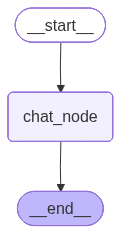

In [18]:
chatbot

In [28]:
initial_state = {
    'messages': [HumanMessage(content='What is the capital of india')]
}

chatbot.invoke(initial_state)['messages'][-1].content

OllamaEndpointNotFoundError: Ollama call failed with status code 404. Maybe your model is not found and you should pull the model with `ollama pull llama3:8b-instruct-q4_K_M`.